In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('fake_or_real_news.csv',usecols=['id','title','text','label'])

In [3]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df['label']=df['label'].apply(lambda x:1 if x=="REAL" else 0)

In [5]:
df.shape

(7795, 4)

In [6]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [7]:
df.isnull().sum()

id       219
title    610
text     866
label      0
dtype: int64

In [8]:
df.isnull().sum()

id       219
title    610
text     866
label      0
dtype: int64

In [9]:
df['title'].fillna(value="missing",inplace=True)
df['text'].fillna(value="missing",inplace=True)

In [10]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [11]:
df['label'].value_counts()

0    4634
1    3161
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt

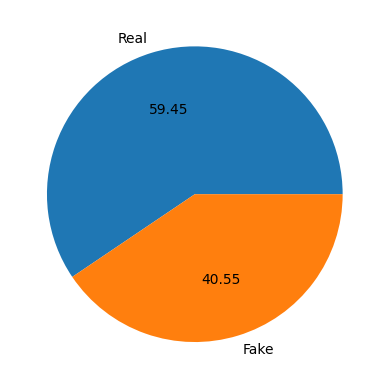

In [13]:
plt.pie(df['label'].value_counts(),labels=['Real','Fake'],autopct="%0.2f")
plt.show()

In [14]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [15]:
def transform_text(text):
    text = text.lower()
    
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [16]:
df['text']=df['text'].apply(transform_text)

In [17]:
X=df['text']
Y=df['label']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidfvect=TfidfVectorizer(stop_words='english',max_df=0.9)

In [22]:
X_train_trf=tfidfvect.fit_transform(X_train)
X_test_trf=tfidfvect.transform(X_test)

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf=PassiveAggressiveClassifier(max_iter=80)

In [24]:
clf.fit(X_train_trf,Y_train)

PassiveAggressiveClassifier(max_iter=80)

In [25]:
Y_pred=clf.predict(X_test_trf)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [27]:
accuracy_score(Y_test,Y_pred)

0.9339320076972418

In [28]:
confusion_matrix(Y_test,Y_pred,labels=[0,1])

array([[888,  55],
       [ 48, 568]], dtype=int64)

In [29]:
precision_score(Y_test,Y_pred)

0.9117174959871589

In [30]:
recall_score(Y_test,Y_pred)

0.922077922077922

In [31]:
import pickle
pickle.dump(tfidfvect,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [32]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [36]:
input_sms = input("Enter the news: ")
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])
result = model.predict(vector_input)[0]
if result == 0:
    print("Fake")
else:
      print("Real")

Enter the news: The role of the US and Nato in EU relations with China by Manlio Dinucci Participating in an international conference, the Italian geographer Manlio Dinucci ties together the various strands of his analysis of the weapons that the US has at its disposal to dominate the entire world. Yet the importance of this article goes beyond that. For it is on account of this domination, this unipolar global order, that Syria, Russia and China, challenge today the use of force. Voltaire Network | Rome (Italy) | 28 October 2016 franÃ§ais EspaÃ±ol I will get straight to the heart of the issue. I do not think it possible to speak of relations between the European Union (the EU) and China independently of the influence the United States wields over the EU directly and [indirectly], through Nato. Today 22 of the 28 (27 once Great Britain has left the EU), EU member states with more than 90% of the EU population, are members of Nato, recognized as the â€œfoundation for collective defenceâ

Fake


In [34]:
from nltk.corpus import stopwords